# Capacitated Vehicle Routing Problem

<img src="http://neo.lcc.uma.es/dynamic/images/vrp.png" width="400" />

- $C$ is the number of clientes
- $N$ is set of clients, with $N=\{1,2,...,C\}$
- $Vertices$ is set of vetices (or nodes), with $Vertices=\{0\}\cup N$
- $A$ is set of arcs, with $A=\{(i,j)\in V^2 : i\neq j\}$
- $dist_{ij}$ is cost of travel over arc $(i,j)\in A$
- $Q$ is the vehicle capacity
- $demande_i$ is the amount that has to be delivered to customer $i\in N$
- $V$ is the number of vehicles
- $Vehicles$ is set of Vehicles

Variables of Decision
- $x_{ijv}$ ,$i \in \{0,1,2,..,C\},j \in \{0,1,2,..,C\}, v \in \{1,2,..,V\} $ ,if the vehicle $v$ pass directly from node $i$ to node $j$, $x_{ijv}$=1, if not, $x_{ijv}=0$
- $nbreVehiculeUtilise$ number of vehicles uses
- $u_{i}, i \in N$ variable to eliminant the subtours (sous-tours)

Les contraintes:
- Il y a pas de chemin de node i vers lui même (2)
- Au moins 1 véhicules utilisés (3)
- Les véhicules si il quitte le dépôt, il rentrera au dépôt à la fin (4)&(5)
- Tous les véhicules quittent la node qu'il a visité (6)
- Chaque client est passé par exactement 1 fois (7)
- La capacité ne doit pas être dépassé (8)
- Les contraites pour éliminer les sous-tours (9)&(10)

Then, the formulation is the following
$$\begin{align}
\min \quad & \sum_{i,j\in A} dist_{ij} x_{ijv} \\
\text{s.t.} \quad 
&x_{iiv} = 0 && \forall i \in Vertices,\forall v \in Vehicles \\
&\sum_{j\in N,v\in Vehicles}x_{1jv}=1\\
&\sum_{j\in N} x_{j1v} <= 1 && \forall v\in Vehicles\\
&\sum_{j\in N} x_{j1v} = \sum_{j\in N} x_{1jv} &&\forall v\in Vehicles \\
&\sum_{i\in Vertices}x_{jiv} = \sum_{i \in Vertices}x_{ijv} &&\forall j\in Vertices, \forall v\in Vehicles\\
&\sum_{v\in Vehicles, i\in Vertices}x_{ijv}=1&&\forall j \in N \\
&\sum_{i\in Vertices, j\in N} demande_{j} x_{ijv} \leqq Q &&\forall v\in Vehicles\\
&u_{j} - u_{i}\geqq demande_{j}- Q(1-x_{ijv})&&\forall i\in N, \forall j\in N,\forall v \in Vehicles, i\neq j\\
&demande_{i} \leqq u_{i} \leqq Q &&\forall i\in N
\end{align}$$

In [228]:
import numpy as np

In [229]:
rnd = np.random
rnd.seed(0)

In [230]:
C = 10
Q = 20
V = 4
Vehicles = [i for i in range(1, V+1)]
N = [i for i in range(1, C+1)]
Vertices = [0] + N
demande = {i: rnd.randint(1, 10) for i in N}

In [234]:
loc_x = rnd.rand(len(Vertices))*200
loc_y = rnd.rand(len(Vertices))*100

In [232]:
import matplotlib.pyplot as plt

(-5.491622693511664, 197.99919848370754, 2.835518541437008, 72.95014821421645)

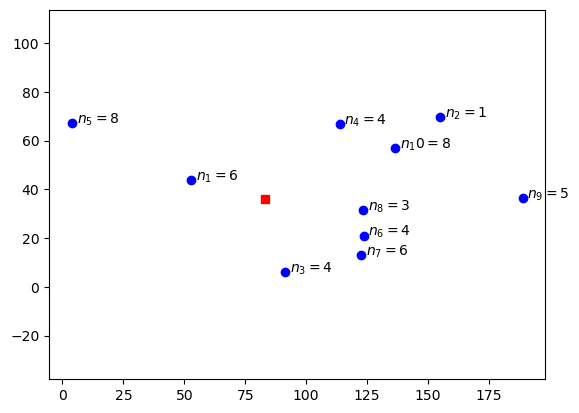

In [235]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$n_%d=%d$' % (i, demande[i]), (loc_x[i]+2, loc_y[i]))
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')

In [236]:
A = [(i, j) for i in Vertices for j in Vertices if i!=j]
B = [(i, j, v) for i in Vertices for j in Vertices for v in Vehicles if i!=j]
print(B)
dist = {(i, j): np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i in Vertices for j in Vertices}
print(dist)

[(0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (0, 5, 1), (0, 5, 2), (0, 5, 3), (0, 5, 4), (0, 6, 1), (0, 6, 2), (0, 6, 3), (0, 6, 4), (0, 7, 1), (0, 7, 2), (0, 7, 3), (0, 7, 4), (0, 8, 1), (0, 8, 2), (0, 8, 3), (0, 8, 4), (0, 9, 1), (0, 9, 2), (0, 9, 3), (0, 9, 4), (0, 10, 1), (0, 10, 2), (0, 10, 3), (0, 10, 4), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (1, 5, 1), (1, 5, 2), (1, 5, 3), (1, 5, 4), (1, 6, 1), (1, 6, 2), (1, 6, 3), (1, 6, 4), (1, 7, 1), (1, 7, 2), (1, 7, 3), (1, 7, 4), (1, 8, 1), (1, 8, 2), (1, 8, 3), (1, 8, 4), (1, 9, 1), (1, 9, 2), (1, 9, 3), (1, 9, 4), (1, 10, 1), (1, 10, 2), (1, 10, 3), (1, 10, 4), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 3, 1), (2, 3, 2), (

In [237]:
from docplex.mp.model import Model

In [238]:
mdl = Model('CVRP')

In [239]:
x = mdl.binary_var_dict(B, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [243]:
mdl.minimize(mdl.sum(dist[i, j]*x[i, j,v]  for i, j,v in B))
mdl.add_constraint(mdl.sum(x[0,j,v] for j in N for v in Vehicles)>=1)#Au moins 1 véhicules utilisés
mdl.add_constraints(mdl.sum(x[j,0,v] for j in N)<=1 for v in Vehicles)#Les véhicules si il quitte le dépôt, il rentrera au dépôt à la fin
mdl.add_constraints(mdl.sum(x[j,0,v] for j in N)==mdl.sum(x[0,j,v] for j in N) for v in Vehicles) #Les véhicules si il quitte le dépôt, il rentrera au dépôt à la fin
#Tous les véhicules quittent la node qu'il a visité
mdl.add_constraints(mdl.sum(x[j,i,v] for i in Vertices if i!=j)== mdl.sum(x[i,j,v] for i in Vertices if i!=j) for j in Vertices for v in Vehicles)
#Chaque client est passé par exactement 1 fois
mdl.add_constraints(mdl.sum(x[i,j,v] for v in Vehicles for i in Vertices if i!=j) == 1 for j in N)
#La capacité ne doit pas être dépassé
mdl.add_constraints(mdl.sum(demande[j]*x[i,j,v] for i in Vertices for j in N if i!=j)<=Q for v in Vehicles)
mdl.add_constraints(u[j]-u[i] >= demande[j]-Q*(1-x[i,j,v]) for i in N for j in N for v in Vehicles if i!=j)
mdl.add_constraints(u[i]<= Q for i in N)
mdl.add_constraints(u[i] >= demande[i] for i in N)
solution = mdl.solve(log_output=True)
#add_contraint et add_contraints => for chaque 

Version identifier: 22.1.1.0 | 2022-11-26 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 24 rows and 0 columns.
Reduced MIP has 423 rows, 450 columns, and 2840 nonzeros.
Reduced MIP has 440 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.80 ticks)
Found incumbent of value 911.735342 after 0.01 sec. (5.55 ticks)
Probing time = 0.00 sec. (2.87 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 423 rows, 450 columns, and 2840 nonzeros.
Reduced MIP has 440 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.96 ticks)
Probing time = 0.00 sec. (2.84 ticks)
Clique table members: 1715.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 12 threads.
Root relaxation solution time = 0.00 sec. (0.89 ticks)

        Nodes                                         Cuts/
   Node  Left     Ob

In [244]:
print(solution)

solution for: CVRP
objective: 536.885
status: OPTIMAL_SOLUTION(2)
x_0_1_4=1
x_0_8_2=1
x_0_9_1=1
x_1_5_4=1
x_2_10_1=1
x_3_0_2=1
x_4_0_1=1
x_5_0_4=1
x_6_7_2=1
x_7_3_2=1
x_8_6_2=1
x_9_2_1=1
x_10_4_1=1
u_1=6.000
u_2=6.000
u_3=20.000
u_4=20.000
u_5=14.000
u_6=7.000
u_7=13.000
u_8=3.000
u_9=5.000
u_10=14.000



In [245]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [246]:

active_arcs = [a for a in B if x[a].solution_value > 0.9]
print (active_arcs)

[(0, 1, 4), (0, 8, 2), (0, 9, 1), (1, 5, 4), (2, 10, 1), (3, 0, 2), (4, 0, 1), (5, 0, 4), (6, 7, 2), (7, 3, 2), (8, 6, 2), (9, 2, 1), (10, 4, 1)]


(-5.491622693511664, 197.99919848370754, 2.835518541437008, 72.95014821421645)

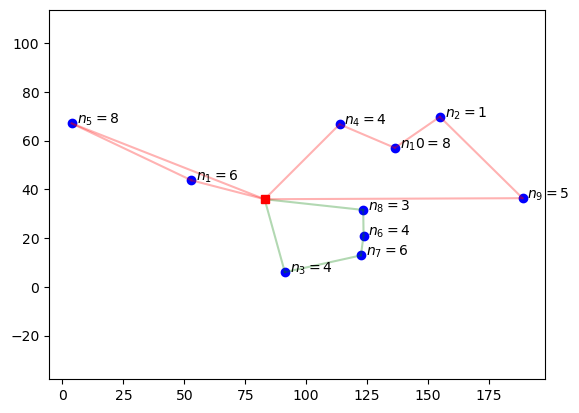

In [247]:
color = ['r', 'g', 'b', 'r']
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$n_%d=%d$' % (i, demande[i]), (loc_x[i]+2, loc_y[i]))
for i, j,v in active_arcs:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c=color[v-1], alpha=0.3)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')